In [307]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For data modeling
import statsmodels.api as sm

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

In [308]:
# Create the dataframe for the raw data
hr_data_raw = pd.read_csv('HR_capstone_dataset.csv')

In [309]:
# Investigate data structure
hr_data_raw.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [310]:
# Investigate data stats
hr_data_raw.info()
hr_data_raw.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [311]:
# Renaming columns so that all are snake_case
hr_data_raw = hr_data_raw.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

In [312]:
# Display duplicates
hr_data_raw[hr_data_raw.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [313]:
# Dropping duplicates as it is unlikely they are intentional or useful
hr_data_raw.drop_duplicates(inplace=True)

## Removing Tenure Outliers

I decided to remove 'tenure' outliers after working through more of the analysis later in this notebook. I came back and removed all the rows were 'tenure' was greater than 6. This is because I later found that there were no employees who left after 6 years. This was also justified by slight improvements to the regression models from removing the outliers. 

In [314]:
distinct_tenures = hr_data_raw['tenure'].unique()

# To display the distinct values
print(distinct_tenures)

[ 3  6  4  5  2  8 10  7]


In [315]:
distinct_projects = hr_data_raw['number_project'].unique()

# To display the distinct values
print(distinct_projects)

[2 5 7 6 4 3]


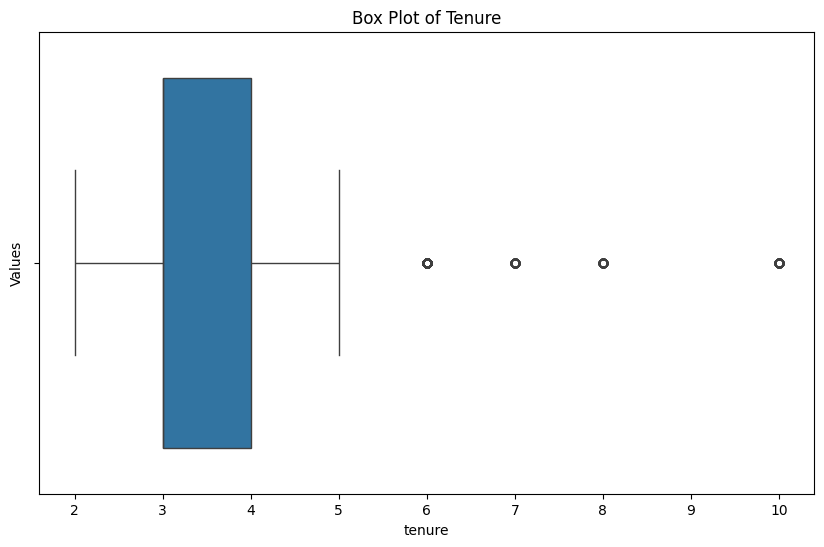

In [316]:
# Plotting tenure to check the distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=hr_data_raw['tenure'])
plt.title('Box Plot of Tenure')
plt.ylabel('Values')
plt.show()

In [317]:
# Check for the number of rows for 'tenure' containing outliers

# Compute the 25th percentile value in `tenure`
percentile25 = hr_data_raw['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = hr_data_raw['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = hr_data_raw[(hr_data_raw['tenure'] > upper_limit) | (hr_data_raw['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


In [318]:
# Filter out rows where 'tenure' is 7 or greater
filtered_df = hr_data_raw[hr_data_raw['tenure'] < 7]  

# Update the original DataFrame
hr_data_raw = filtered_df.copy() 

## Checking the target variable

Since we are trying to predict which employees might be likely to leave the company I needed to check the value counts for 'left'. With the target prediction value(1) for 'left' making up 17% of the dataset, we shouldn't need to oversample with most models. 

In [319]:
# Check number and percentage of employees who left 
value_counts = hr_data_raw['left'].value_counts()
percentages = hr_data_raw['left'].value_counts(normalize=True) * 100

# Combine counts and percentages in a single DataFrame for display
combined = pd.DataFrame({'Counts': value_counts, 'Percentage (%)': percentages.round(2)})
print(combined)


      Counts  Percentage (%)
left                        
0       9718            83.0
1       1991            17.0


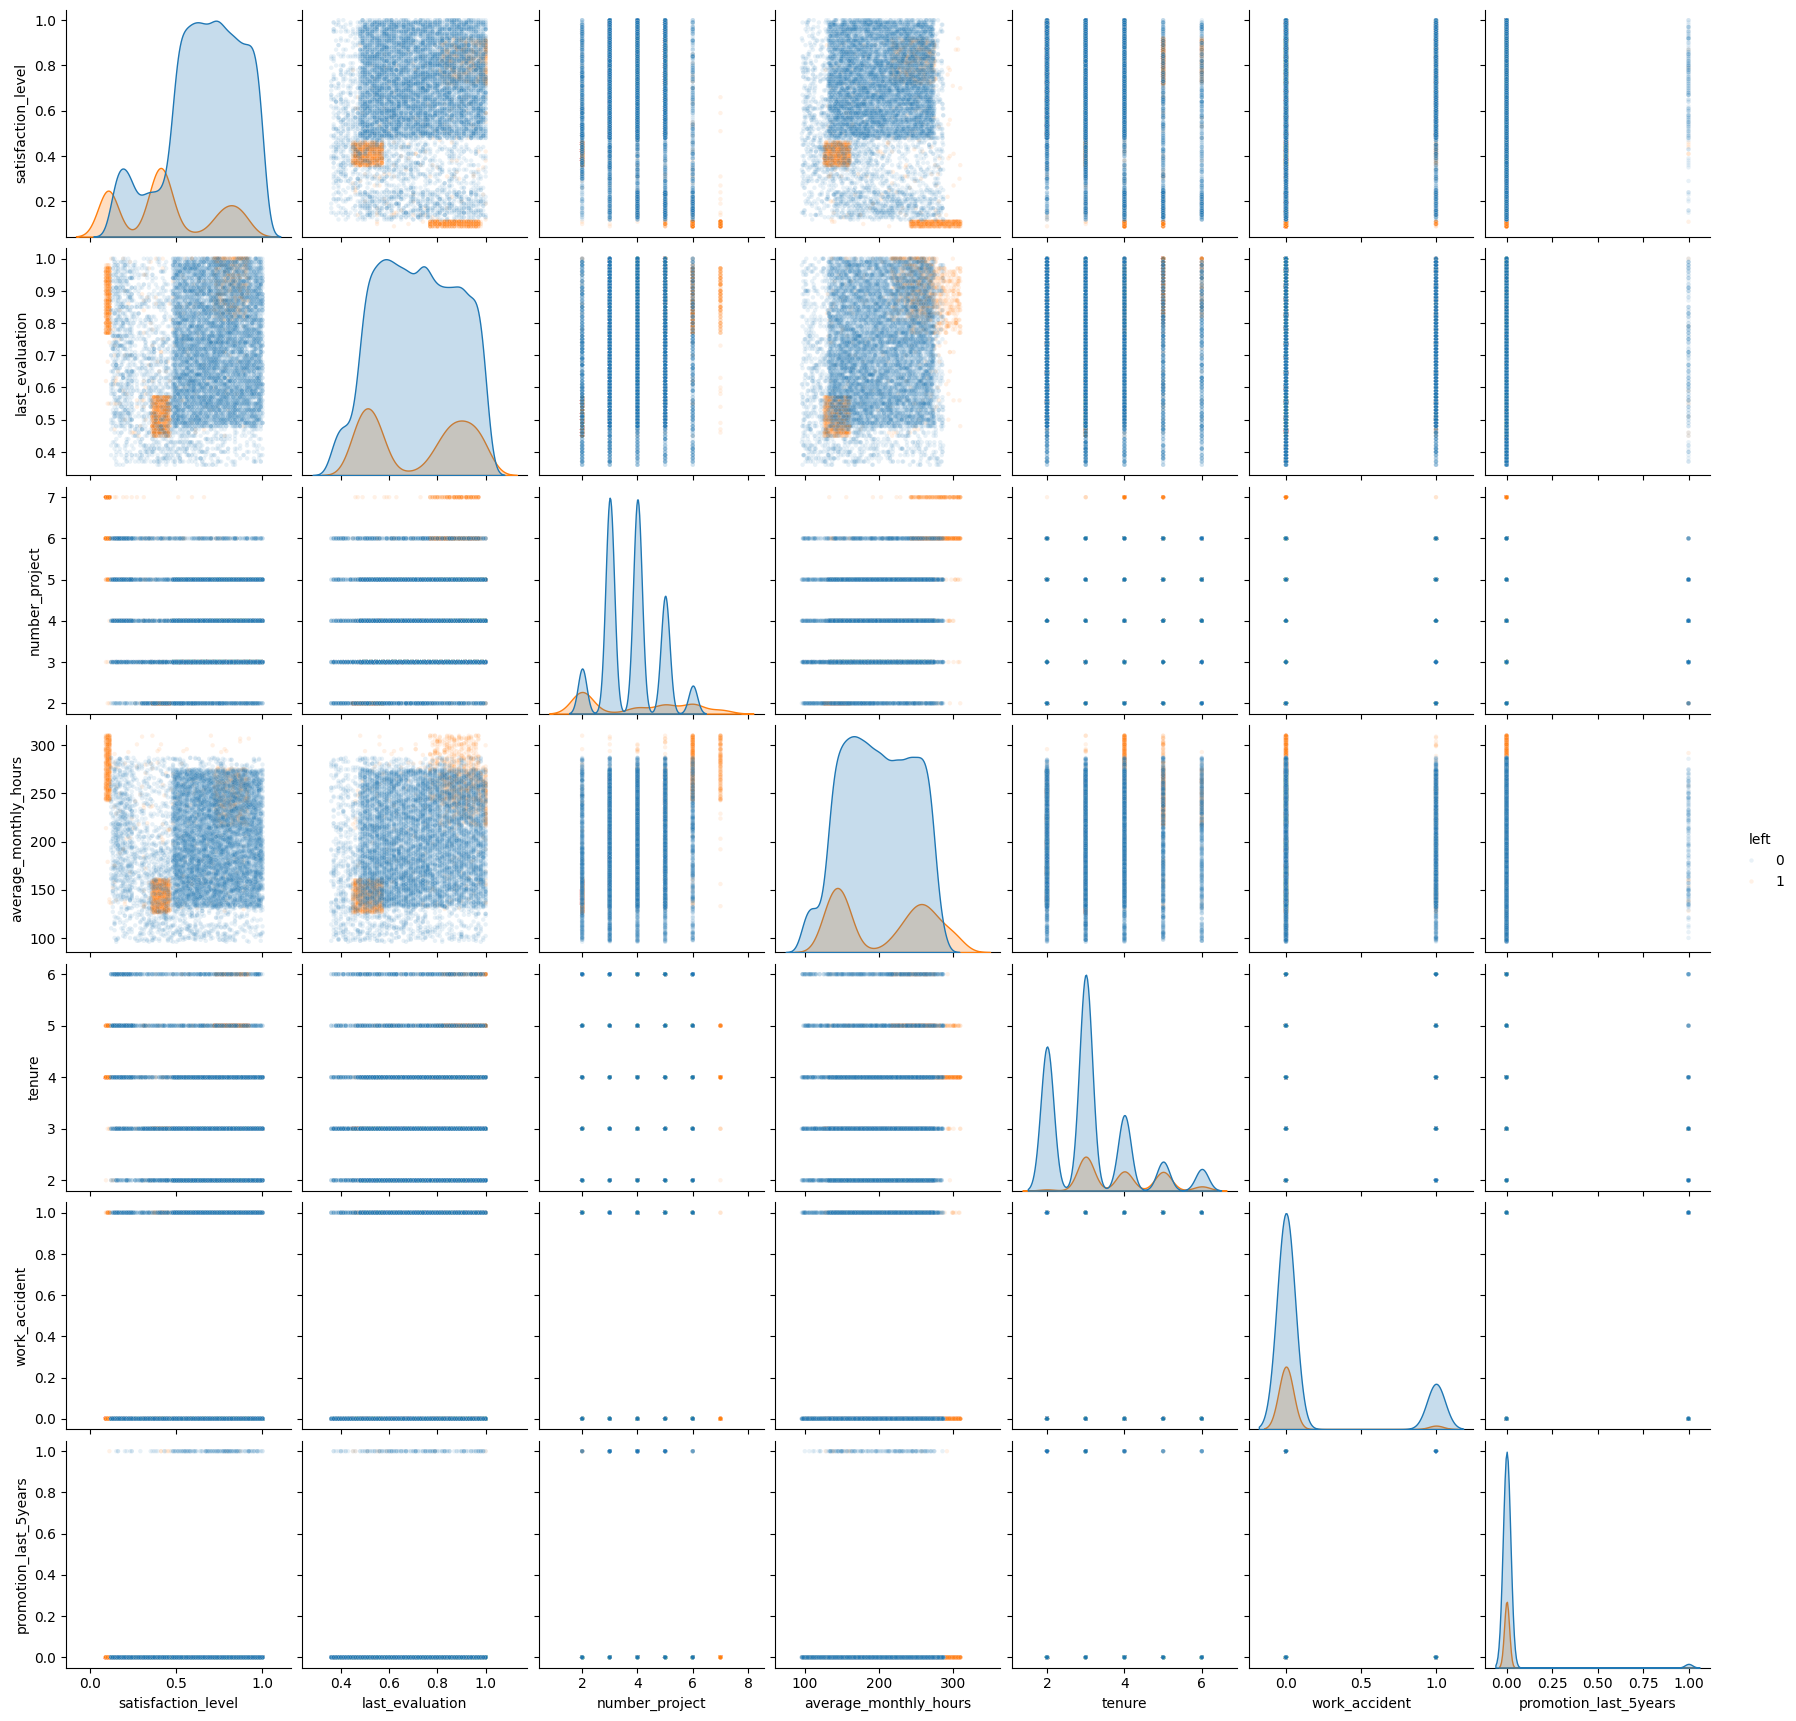

In [320]:
sns.pairplot(hr_data_raw, hue='left', plot_kws={'alpha':0.1,'s':10})

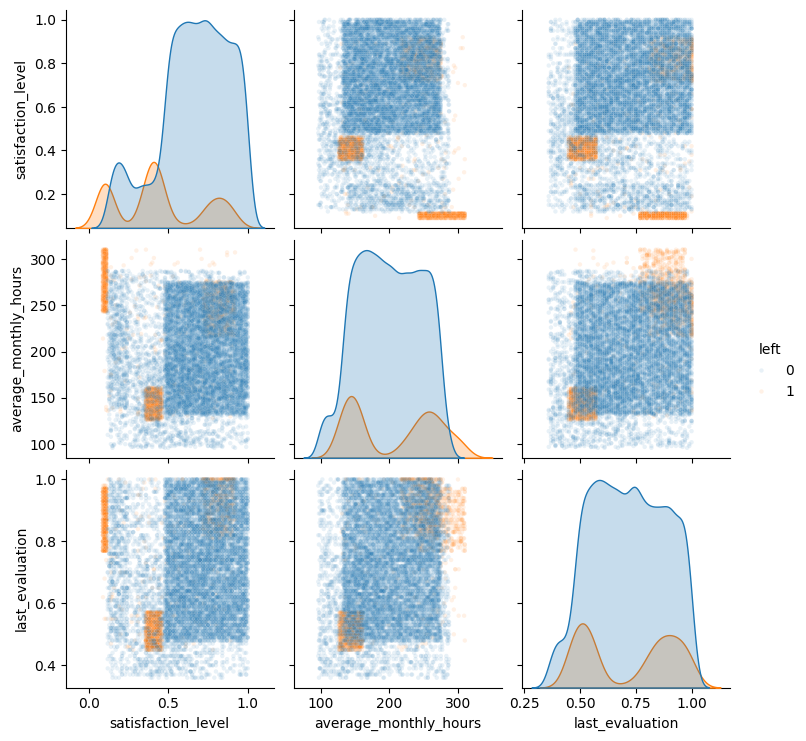

In [365]:
# Select the desired variables
variables = ['satisfaction_level', 'average_monthly_hours', 'last_evaluation', 'left']

# Create a DataFrame containing only the selected variables
data_subset = hr_data_raw[variables] 

# Create the pairplot with your customizations
sns.pairplot(data_subset, hue='left', plot_kws={'alpha': 0.1, 's': 10}) 

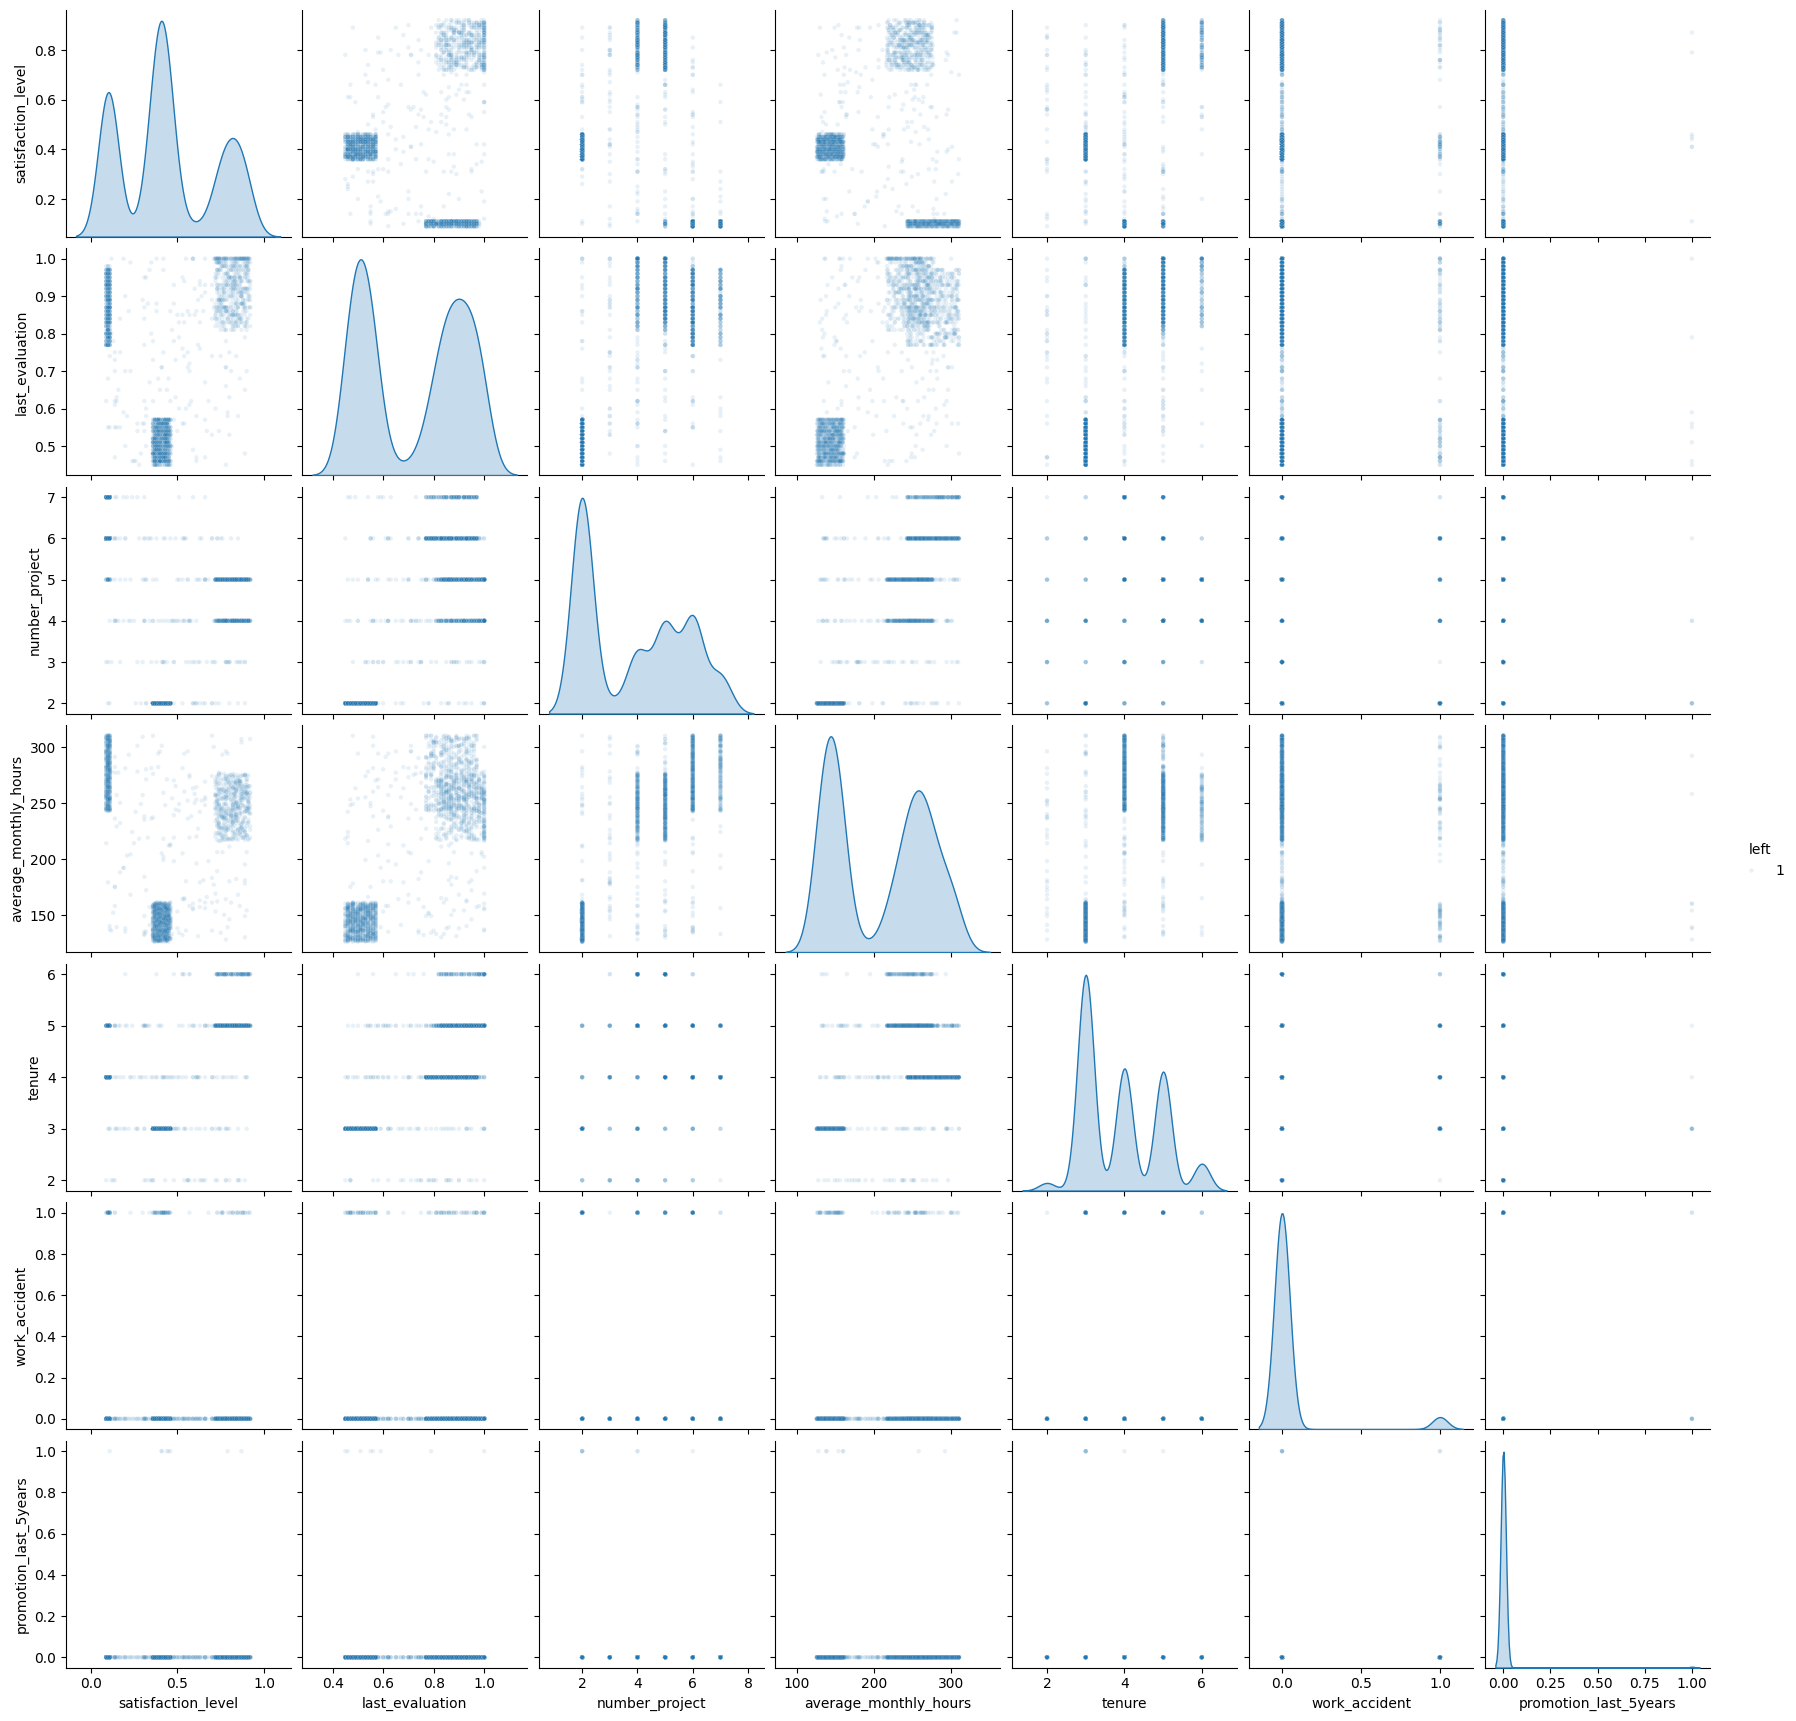

In [321]:
sns.pairplot(hr_data_raw[hr_data_raw['left']==1], hue='left', plot_kws={'alpha':0.1,'s':10})
plt.show()

## Investigating Satisfaction Level

To me, satisfaction_level seemed like it might have the most linear relationship with which employees decided to leave the company. This prompted me to investigate several aspects of that relationship. 

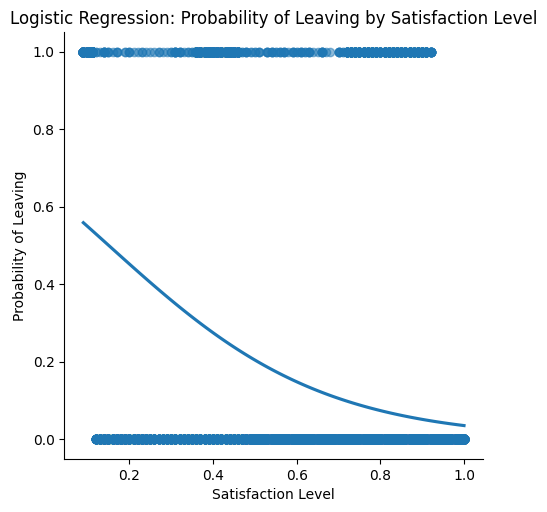

In [322]:
# Create a logistic regression plot
sns.lmplot(x='satisfaction_level', y='left', data=hr_data_raw, logistic=True, ci=None, scatter_kws={'alpha':0.5})

plt.title('Logistic Regression: Probability of Leaving by Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Probability of Leaving')
plt.show()

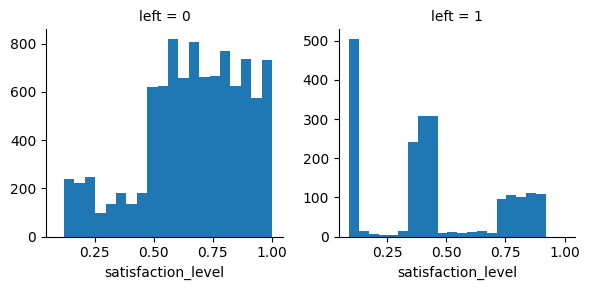

In [323]:
g = sns.FacetGrid(hr_data_raw, col="left", sharey=False)
g.map(plt.hist, "satisfaction_level", bins=20)

plt.show()

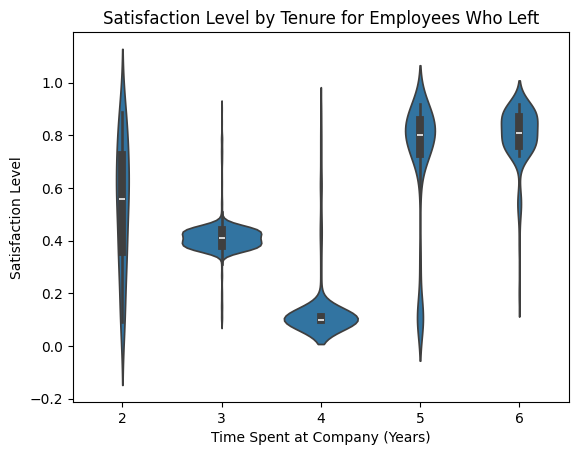

In [324]:
# Filter to include only employees who left
left_employees = hr_data_raw[hr_data_raw['left'] == 1]

sns.violinplot(data=left_employees, x='tenure', y='satisfaction_level')

plt.title('Satisfaction Level by Tenure for Employees Who Left')
plt.xlabel('Time Spent at Company (Years)')
plt.ylabel('Satisfaction Level')
plt.show()

In [325]:
# Calculate the average last_evaluation for employees who left
average_last_evaluation = left_employees['last_evaluation'].mean()
average_last_evaluation

0.7217830236062281

In [326]:
# Count number of employees who left with satisfaction_level above 0.5
num_above_05 = left_employees[left_employees['satisfaction_level'] > 0.5].shape[0]

# Count number of employees who left with satisfaction_level below or equal to 0.5
num_below_or_equal_05 = left_employees[left_employees['satisfaction_level'] <= 0.5].shape[0]

print(f"Number of employees who left with satisfaction level above 0.5: {num_above_05}")
print(f"Number of employees who left with satisfaction level below or equal to 0.5: {num_below_or_equal_05}")


Number of employees who left with satisfaction level above 0.5: 577
Number of employees who left with satisfaction level below or equal to 0.5: 1414


In [327]:
promotion_counts = hr_data_raw['promotion_last_5years'].value_counts()
promotion_counts

promotion_last_5years
0    11537
1      172
Name: count, dtype: int64

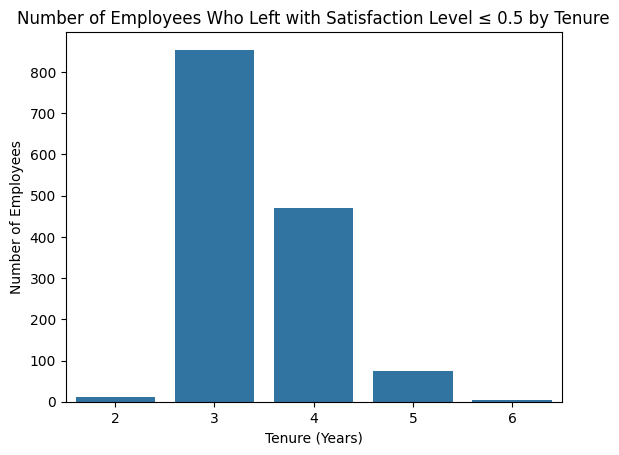

In [328]:
# Filter to include only employees who left and had a satisfaction_level at or below 0.5
left_employees_below_05 = hr_data_raw[(hr_data_raw['left'] == 1) & (hr_data_raw['satisfaction_level'] <= 0.5)]

# Group by tenure and count the number of employees
tenure_counts_below_05 = left_employees_below_05.groupby('tenure').size().reset_index(name='counts')

# Create a bar plot
sns.barplot(data=tenure_counts_below_05, x='tenure', y='counts')

plt.title('Number of Employees Who Left with Satisfaction Level ≤ 0.5 by Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Number of Employees')
plt.show()

In [329]:
# Calculate average satisfaction by 'left' group
average_satisfaction_by_status = hr_data_raw.groupby('left')['satisfaction_level'].mean()

# Print the results
print("Average satisfaction score for those who left:", average_satisfaction_by_status[1])
print("Average satisfaction score for those who didn't leave:", average_satisfaction_by_status[0])

Average satisfaction score for those who left: 0.440271220492215
Average satisfaction score for those who didn't leave: 0.6678205392055979


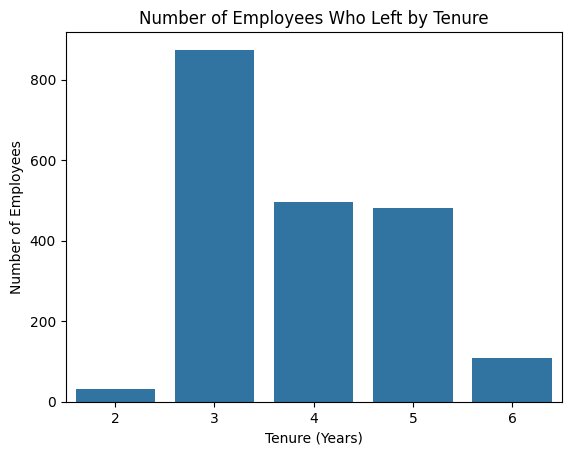

In [330]:
# Group by tenure and count the number of employees
tenure_counts = left_employees.groupby('tenure').size().reset_index(name='counts')

# Create a bar plot
sns.barplot(data=tenure_counts, x='tenure', y='counts')

plt.title('Number of Employees Who Left by Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Number of Employees')
plt.show()


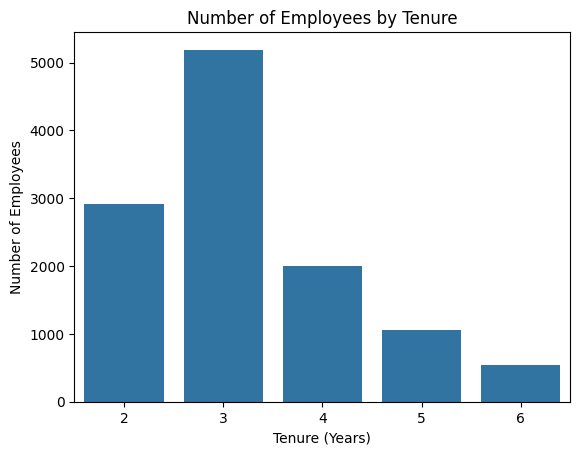

In [331]:
all_tenure_counts = hr_data_raw.groupby('tenure').size().reset_index(name='counts')

sns.barplot(data=all_tenure_counts, x='tenure', y='counts')

plt.title('Number of Employees by Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Number of Employees')
plt.show()

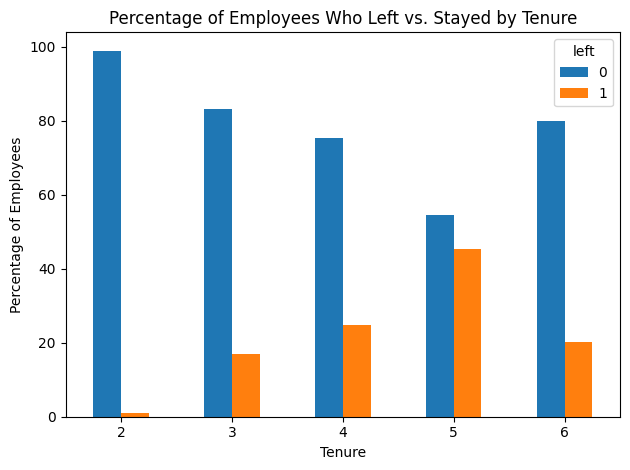

In [332]:
# Calculate the percentage of employees who left and didn't leave for each tenure value
left_counts = hr_data_raw.groupby('tenure')['left'].value_counts(normalize=True) * 100

# Reshape the data for plotting
left_counts = left_counts.unstack(fill_value=0)

# Create the bar chart
left_counts.plot(kind='bar', stacked=False)
plt.xlabel('Tenure')
plt.ylabel('Percentage of Employees')
plt.title('Percentage of Employees Who Left vs. Stayed by Tenure')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

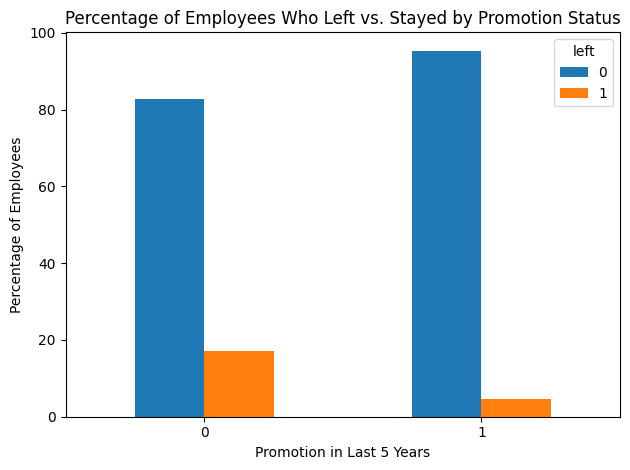

In [333]:
# Calculate the percentage of employees who left and didn't leave for each promotion status
left_counts = hr_data_raw.groupby('promotion_last_5years')['left'].value_counts(normalize=True) * 100

# Reshape the data for plotting
left_counts = left_counts.unstack(fill_value=0)

# Create the bar chart
left_counts.plot(kind='bar', stacked=False)
plt.xlabel('Promotion in Last 5 Years')
plt.ylabel('Percentage of Employees')
plt.title('Percentage of Employees Who Left vs. Stayed by Promotion Status')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

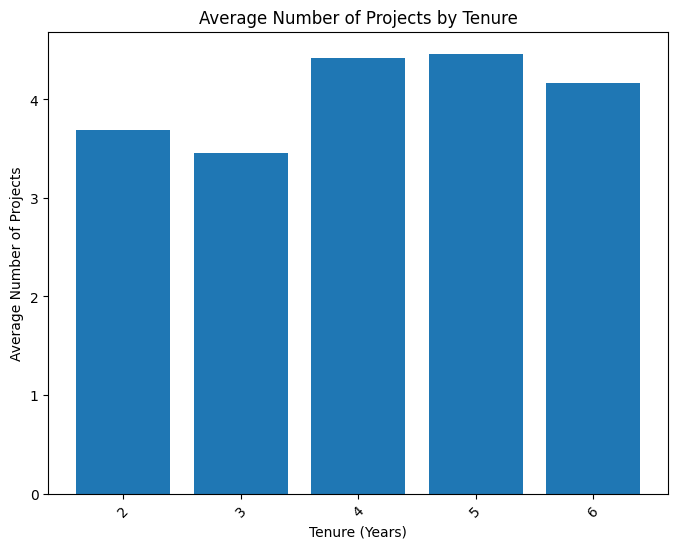

In [334]:
# Calculate average projects per tenure
average_projects_by_tenure = hr_data_raw.groupby('tenure')['number_project'].mean()

plt.figure(figsize=(8, 6))
plt.bar(average_projects_by_tenure.index, average_projects_by_tenure.values)
plt.xlabel("Tenure (Years)")
plt.ylabel("Average Number of Projects")
plt.title("Average Number of Projects by Tenure")

# Rotate x-axis labels for readability if needed
plt.xticks(rotation=45)

plt.show()


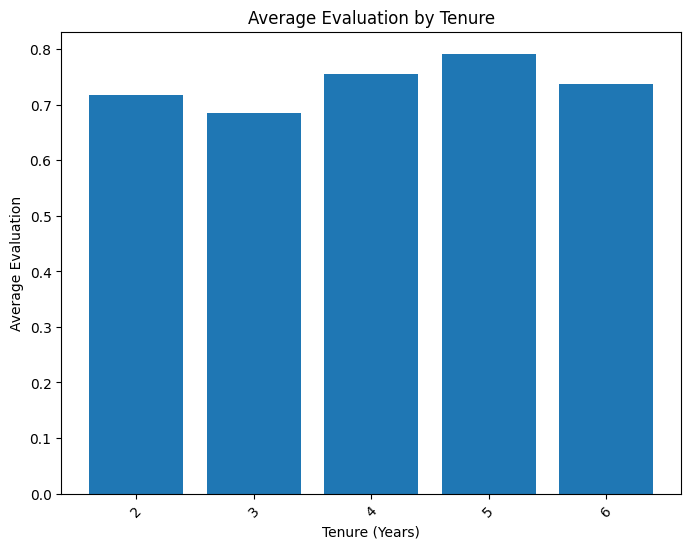

In [335]:
# Calculate average projects per tenure
average_projects_by_tenure = hr_data_raw.groupby('tenure')['last_evaluation'].mean()

plt.figure(figsize=(8, 6))
plt.bar(average_projects_by_tenure.index, average_projects_by_tenure.values)
plt.xlabel("Tenure (Years)")
plt.ylabel("Average Evaluation")
plt.title("Average Evaluation by Tenure")

# Rotate x-axis labels for readability if needed
plt.xticks(rotation=45)

plt.show()

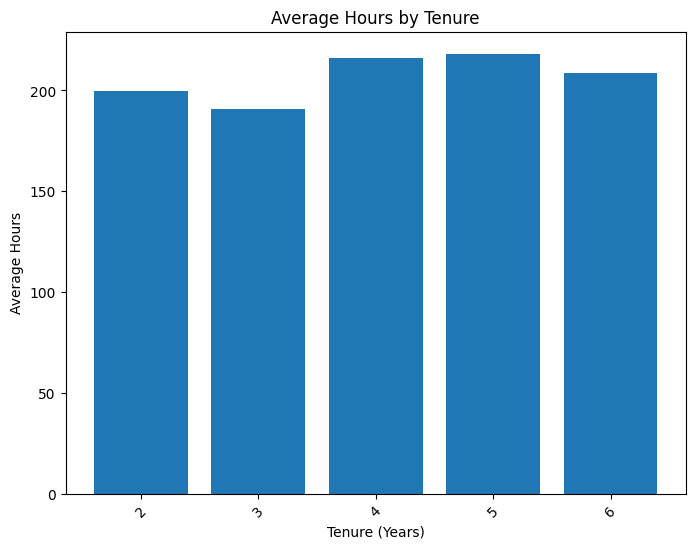

In [336]:
# Calculate average projects per tenure
average_projects_by_tenure = hr_data_raw.groupby('tenure')['average_monthly_hours'].mean()

plt.figure(figsize=(8, 6))
plt.bar(average_projects_by_tenure.index, average_projects_by_tenure.values)
plt.xlabel("Tenure (Years)")
plt.ylabel("Average Hours")
plt.title("Average Hours by Tenure")

# Rotate x-axis labels for readability if needed
plt.xticks(rotation=45)

plt.show()

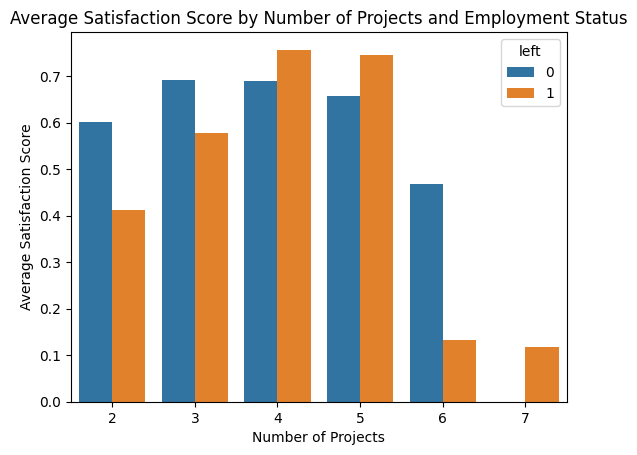

In [337]:
# Use a bar chart to look at the average satisfaction by number of projects for those who left and those who didn't

# Group by number_project and left, then calculate mean satisfaction_level
average_satisfaction_projects = hr_data_raw.groupby(['number_project', 'left'])['satisfaction_level'].mean().reset_index()

# Create a bar chart with hue to differentiate those who left from those who didn't
sns.barplot(x='number_project', y='satisfaction_level', hue='left', data=average_satisfaction_projects)

# Adding labels and title
plt.xlabel('Number of Projects')
plt.ylabel('Average Satisfaction Score')
plt.title('Average Satisfaction Score by Number of Projects and Employment Status')

# Show the plot
plt.show()

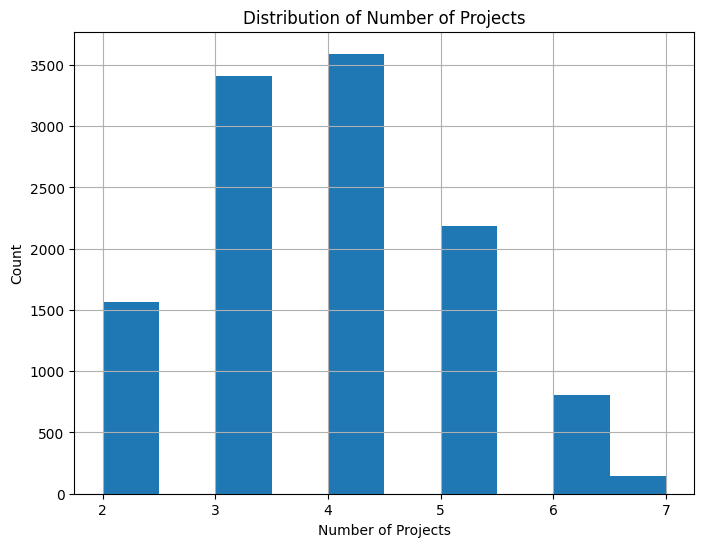

In [338]:
# Create the histogram
plt.figure(figsize=(8, 6))
plt.hist(hr_data_raw['number_project'])
plt.xlabel("Number of Projects")
plt.ylabel("Count")
plt.title("Distribution of Number of Projects")
plt.grid(True) 
plt.show()

## What This tells me

The above chart gives us several usesful pieces of information. 
* Anything more than 5 projects seems to have significant impact on satisfaction score. 
* No employees stayed with over 6 projects. 

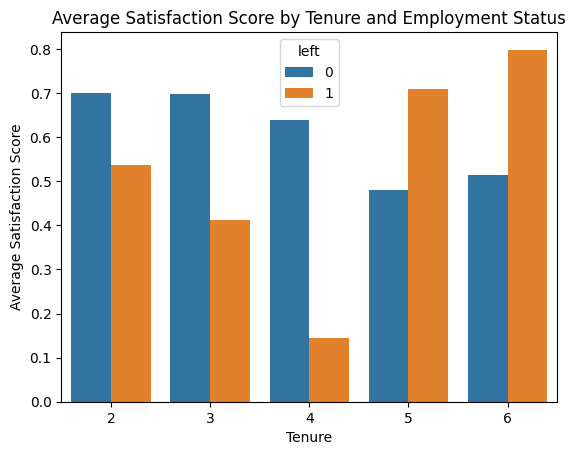

In [339]:
# Use a bar chart to look at average satisfaction by tenure for those who left and those who didn't 

# Group by tenure and left, then calculate mean satisfaction_level
average_satisfaction_tenure = hr_data_raw.groupby(['tenure', 'left'])['satisfaction_level'].mean().reset_index()

# Create a bar chart with hue to differentiate those who left from those who didn't
sns.barplot(x='tenure', y='satisfaction_level', hue='left', data=average_satisfaction_tenure)

# Adding labels and title
plt.xlabel('Tenure')
plt.ylabel('Average Satisfaction Score')
plt.title('Average Satisfaction Score by Tenure and Employment Status')

# Show the plot
plt.show()

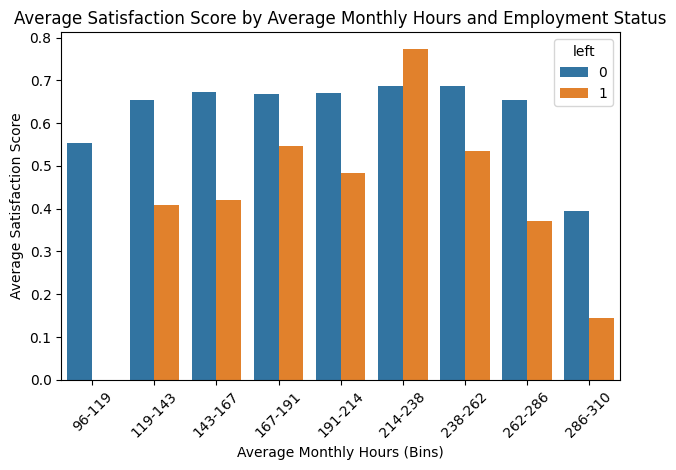

In [340]:
# --- Binning in a Separate DataFrame ---
bins = np.linspace(hr_data_raw['average_monthly_hours'].min(), 
                   hr_data_raw['average_monthly_hours'].max(),
                   num=10)
hour_bins = pd.cut(hr_data_raw['average_monthly_hours'], bins, labels=False, include_lowest=True)
df_bins = pd.DataFrame({'hour_bins': hour_bins}) 

# --- Group By and Calculations --- 
average_satisfaction_hours = hr_data_raw.join(df_bins).groupby(['hour_bins', 'left'])['satisfaction_level'].mean().reset_index()

# Map bin number to hour range
average_satisfaction_hours['hour_bins'] = average_satisfaction_hours['hour_bins'].apply(lambda x: f"{int(bins[x])}-{int(bins[x+1])}")

# --- Visualization ---
sns.barplot(x='hour_bins', y='satisfaction_level', hue='left', data=average_satisfaction_hours)

plt.xlabel('Average Monthly Hours (Bins)')
plt.ylabel('Average Satisfaction Score')
plt.title('Average Satisfaction Score by Average Monthly Hours and Employment Status')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

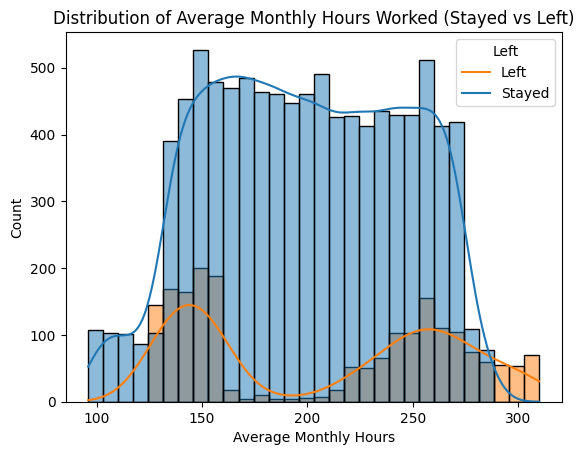

In [341]:
# Create the histogram
sns.histplot(data=hr_data_raw, x='average_monthly_hours', hue='left', bins=30, kde=True)

plt.title('Distribution of Average Monthly Hours Worked (Stayed vs Left)')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Count')
plt.legend(title='Left', labels=['Left', 'Stayed'])
plt.show()

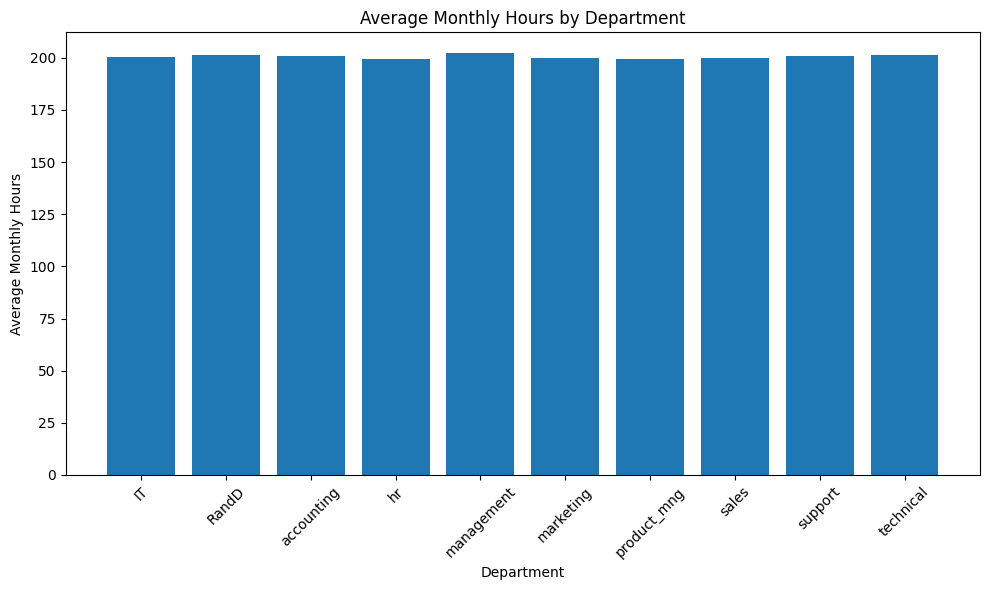

In [342]:
# Calculate average hours by department
average_hours_by_dept = hr_data_raw.groupby('department')['average_monthly_hours'].mean()

plt.figure(figsize=(10, 6))
plt.bar(average_hours_by_dept.index, average_hours_by_dept.values)
plt.xlabel("Department")
plt.ylabel("Average Monthly Hours")
plt.title("Average Monthly Hours by Department")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 

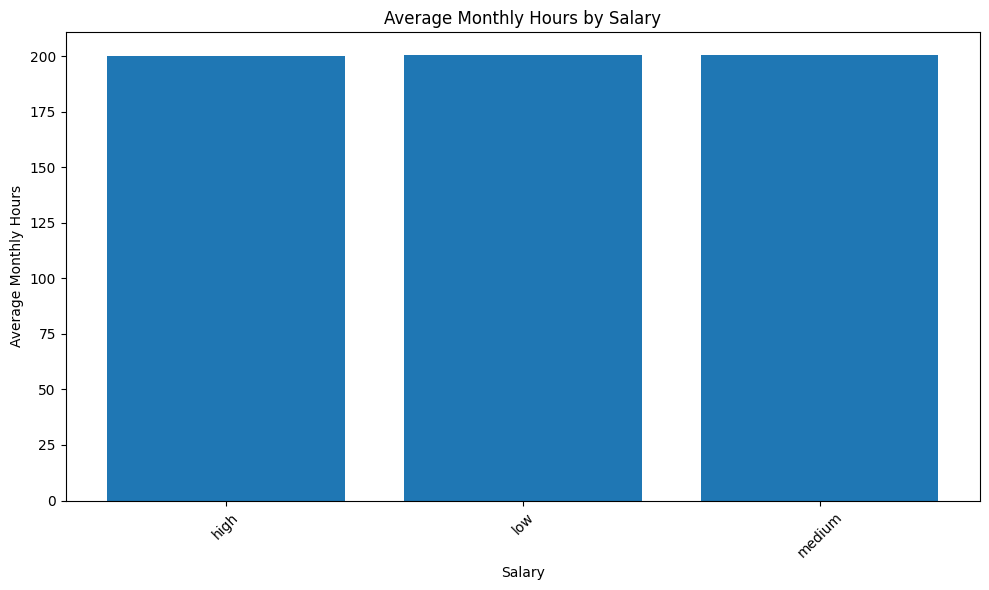

In [343]:
average_hours_by_salary = hr_data_raw.groupby('salary')['average_monthly_hours'].mean()

plt.figure(figsize=(10, 6))
plt.bar(average_hours_by_salary.index, average_hours_by_salary.values)
plt.xlabel("Salary")
plt.ylabel("Average Monthly Hours")
plt.title("Average Monthly Hours by Salary")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 

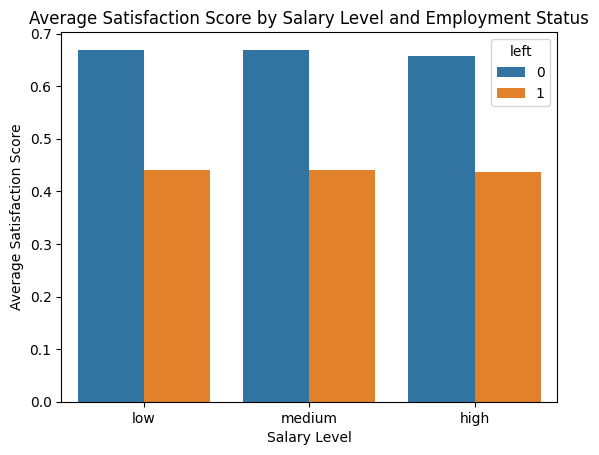

In [344]:
# Group by salary and left, then calculate mean satisfaction_level
average_satisfaction_salary = hr_data_raw.groupby(['salary', 'left'])['satisfaction_level'].mean().reset_index()

# Create a bar chart with hue to differentiate those who left from those who didn't
sns.barplot(x='salary', y='satisfaction_level', hue='left', data=average_satisfaction_salary, order=['low', 'medium', 'high'])

# Adding labels and title
plt.xlabel('Salary Level')
plt.ylabel('Average Satisfaction Score')
plt.title('Average Satisfaction Score by Salary Level and Employment Status')

# Show the plot
plt.show()

   salary  left  satisfaction_level
0    high     0            0.656995
1    high     1            0.437500
2     low     0            0.669265
3     low     1            0.440630
4  medium     0            0.668525
5  medium     1            0.439896


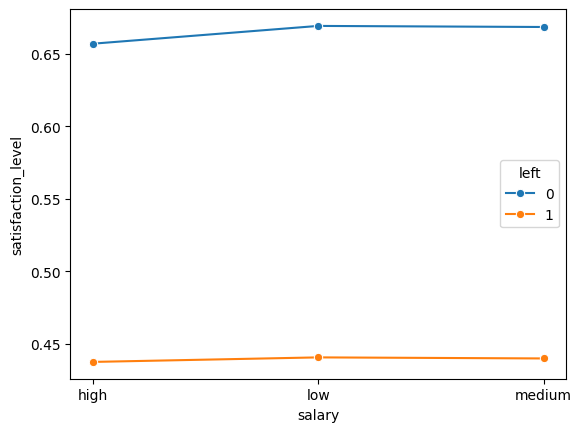

In [345]:
# Print the DataFrame to check the data
print(average_satisfaction_salary)

# Optional: Quick check using a line plot
sns.lineplot(x='salary', y='satisfaction_level', hue='left', data=average_satisfaction_salary, marker='o')
plt.show()

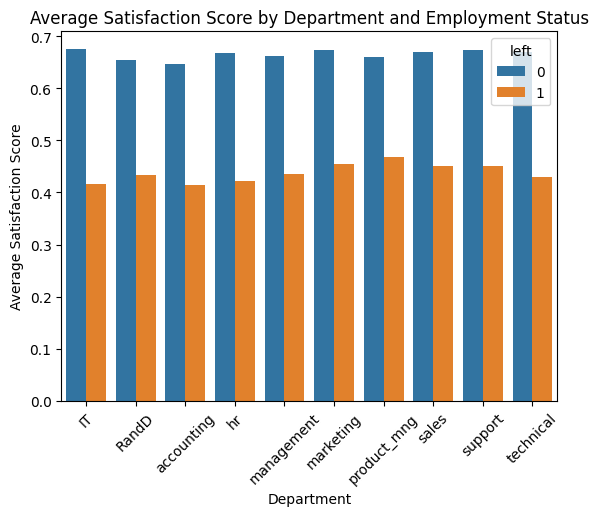

In [346]:
# Group by department and left, then calculate mean satisfaction_level
average_satisfaction = hr_data_raw.groupby(['department', 'left'])['satisfaction_level'].mean().reset_index()

# Create a bar chart with hue to differentiate those who left from those who didn't
sns.barplot(x='department', y='satisfaction_level', hue='left', data=average_satisfaction)

# Improving readability:
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adding labels and title
plt.xlabel('Department')
plt.ylabel('Average Satisfaction Score')
plt.title('Average Satisfaction Score by Department and Employment Status')

# Show the plot
plt.show()

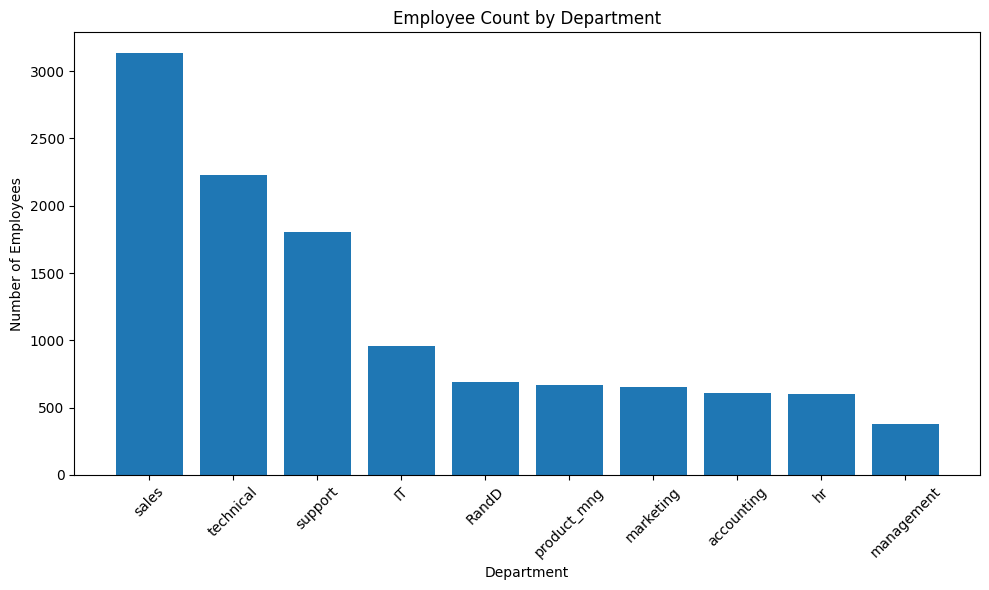

In [347]:
# Count employees in each department
employee_counts_by_dept = hr_data_raw['department'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(employee_counts_by_dept.index, employee_counts_by_dept.values)
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.title("Employee Count by Department")
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

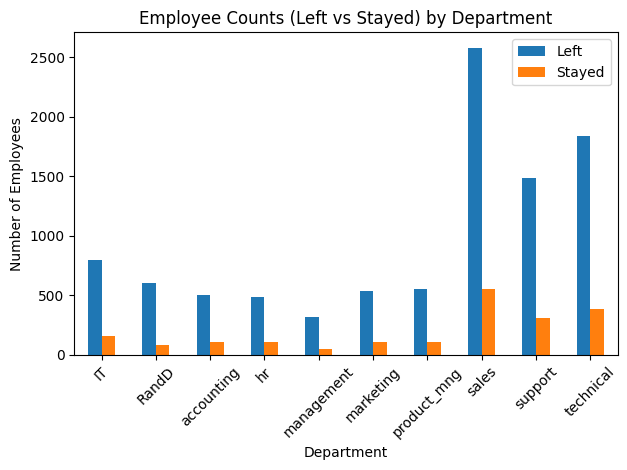

In [348]:
# Group by department and left status
employee_counts = hr_data_raw.groupby(['department', 'left'])['department'].count().unstack()

# Visualization 
plt.figure(figsize=(10, 6))
employee_counts.plot(kind='bar')
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.title("Employee Counts (Left vs Stayed) by Department")
plt.legend(['Left', 'Stayed']) 
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

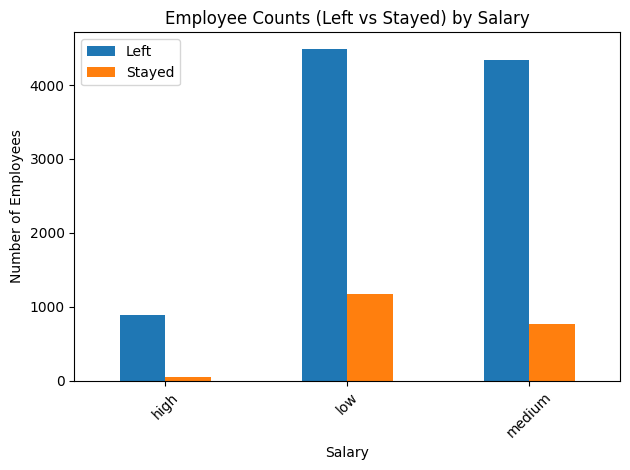

In [349]:
# Group by department and left status
employee_counts = hr_data_raw.groupby(['salary', 'left'])['salary'].count().unstack()

# Visualization 
plt.figure(figsize=(10, 6))
employee_counts.plot(kind='bar')
plt.xlabel("Salary")
plt.ylabel("Number of Employees")
plt.title("Employee Counts (Left vs Stayed) by Salary")
plt.legend(['Left', 'Stayed']) 
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

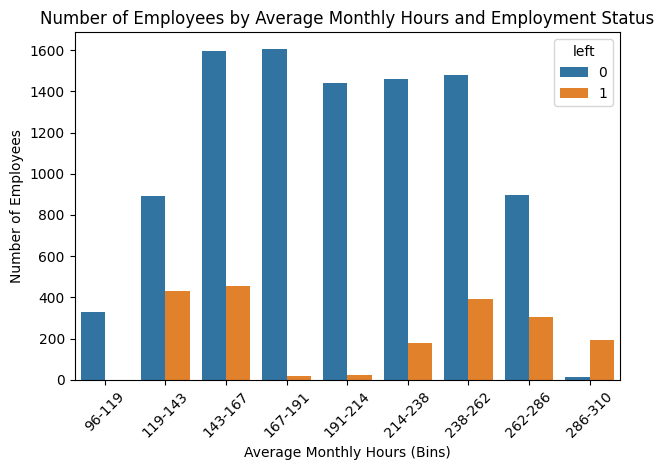

In [350]:
# Create bins for average_monthly_hours
bins = np.linspace(hr_data_raw['average_monthly_hours'].min(), hr_data_raw['average_monthly_hours'].max(), num=10)

# Create a new dataframe with hour_bins and count
employee_count_by_hours = (
    hr_data_raw.assign(hour_bins=pd.cut(hr_data_raw['average_monthly_hours'], bins, labels=False, include_lowest=True))
    .groupby(['hour_bins', 'left'])
    .size()
    .to_frame(name='count')
    .reset_index()
)

# Map bin number back to hour range for better readability in the chart
employee_count_by_hours['hour_bins'] = employee_count_by_hours['hour_bins'].apply(lambda x: f"{int(bins[x])}-{int(bins[x+1])}")

# Create a bar chart with hue to differentiate those who left from those who didn't
sns.barplot(x='hour_bins', y='count', hue='left', data=employee_count_by_hours)

# Adding labels and title
plt.xlabel('Average Monthly Hours (Bins)')
plt.ylabel('Number of Employees')
plt.title('Number of Employees by Average Monthly Hours and Employment Status')

# Improve layout for readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

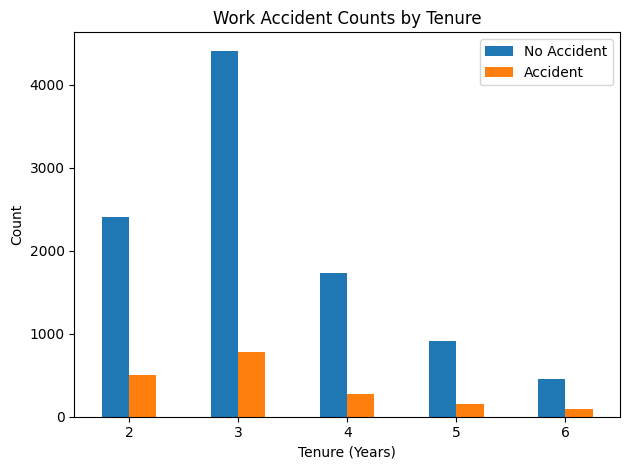

In [351]:
# Group by tenure and work_accident status
accident_counts = hr_data_raw.groupby(['tenure', 'work_accident'])['work_accident'].count().unstack()

# Visualization 
plt.figure(figsize=(10, 6))
accident_counts.plot(kind='bar')
plt.xlabel("Tenure (Years)")
plt.ylabel("Count")
plt.title("Work Accident Counts by Tenure")
plt.legend(['No Accident', 'Accident']) 
plt.xticks(rotation=0)  # Adjust rotation if needed
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

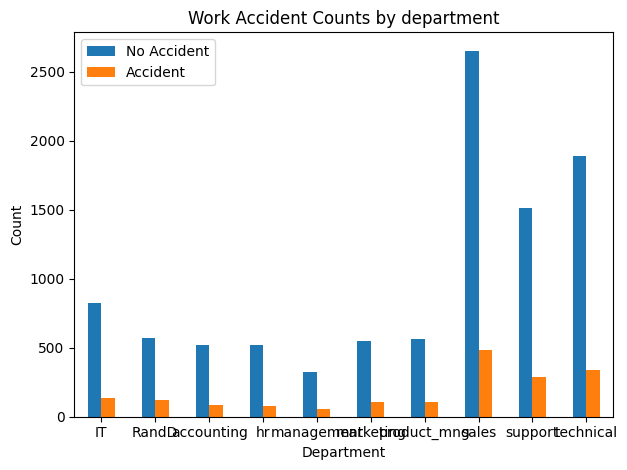

In [352]:
# Group by tenure and work_accident status
accident_counts = hr_data_raw.groupby(['department', 'work_accident'])['work_accident'].count().unstack()

# Visualization 
plt.figure(figsize=(10, 6))
accident_counts.plot(kind='bar')
plt.xlabel("Department")
plt.ylabel("Count")
plt.title("Work Accident Counts by department")
plt.legend(['No Accident', 'Accident']) 
plt.xticks(rotation=0)  # Adjust rotation if needed
plt.tight_layout()
plt.show()

# Linear Regression Modeling

## Encoding categorical variables

In [353]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
categorical_columns = ['department', 'salary', ] 
hr_data_raw[categorical_columns] = encoder.fit_transform(hr_data_raw[categorical_columns])

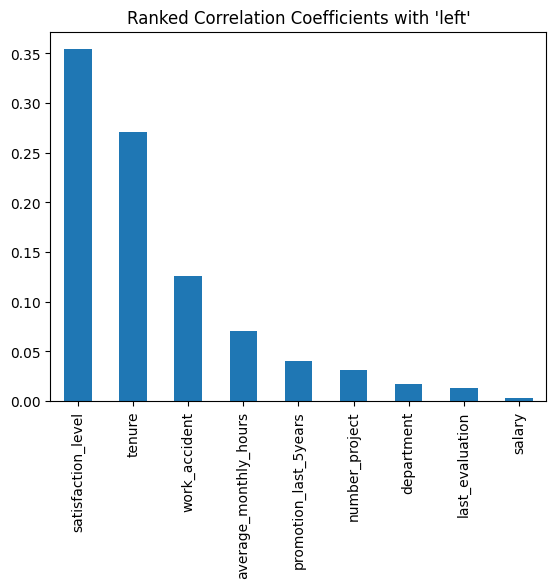

In [354]:
# Select correlations with the 'left' column
correlations = hr_data_raw.corr()['left']

# Rank correlations (absolute values for both positive and negative relationships)
ranked_correlations = correlations.drop('left').abs().sort_values(ascending=False)

ranked_correlations.plot.bar()
plt.title("Ranked Correlation Coefficients with 'left'")
plt.show()

In [355]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE  

X2 = hr_data_raw[['satisfaction_level', 'number_project', 'tenure', 'average_monthly_hours', 'last_evaluation' ]]
y2 = hr_data_raw['left']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=42) 

model2 = LogisticRegression() 
model2.fit(X2_train, y2_train)

y2_pred = model2.predict(X2_test)

print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("Confusion Matrix:\n", confusion_matrix(y2_test, y2_pred))
print("Classification Report:\n", classification_report(y2_test, y2_pred)) 

Accuracy: 0.8131830601092896
Confusion Matrix:
 [[2312  120]
 [ 427   69]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      2432
           1       0.37      0.14      0.20       496

    accuracy                           0.81      2928
   macro avg       0.60      0.54      0.55      2928
weighted avg       0.76      0.81      0.78      2928



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [356]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder

X3 = hr_data_raw.drop('left', axis=1) # Assuming 'left' is your target column
y3 = hr_data_raw['left']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.25, random_state=42)

model3 = RandomForestClassifier(n_estimators=200)  

model3.fit(X3_train, y3_train)

y3_pred = model3.predict(X3_test)

print("Accuracy:", accuracy_score(y3_test, y3_pred))
print("Confusion Matrix:\n", confusion_matrix(y3_test, y3_pred))
print("Classification Report:\n", classification_report(y3_test, y3_pred))

Accuracy: 0.9812158469945356
Confusion Matrix:
 [[2425    7]
 [  48  448]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2432
           1       0.98      0.90      0.94       496

    accuracy                           0.98      2928
   macro avg       0.98      0.95      0.97      2928
weighted avg       0.98      0.98      0.98      2928



In [357]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, None] 
}

grid_search = GridSearchCV(model3, param_grid, cv=5)  # Cross-Validation
grid_search.fit(X3_train, y3_train)

best_model = grid_search.best_estimator_
print(best_model)

RandomForestClassifier()


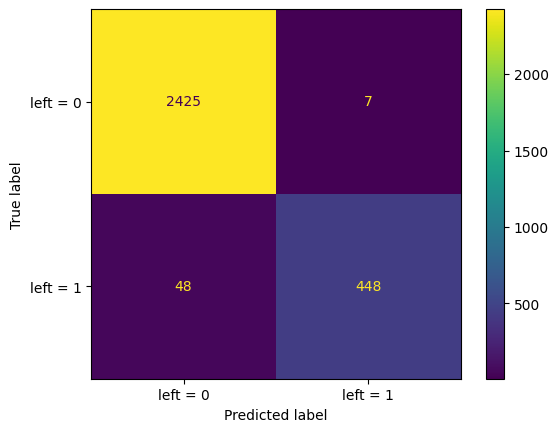

In [358]:
import sklearn.metrics as metrics

# Create the confusion matrix 
cm = metrics.confusion_matrix(y3_test, y3_pred)

# Create the plot object with an option to specify labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['left = 0', 'left = 1'])

# Plot the confusion matrix
disp.plot()
plt.show()

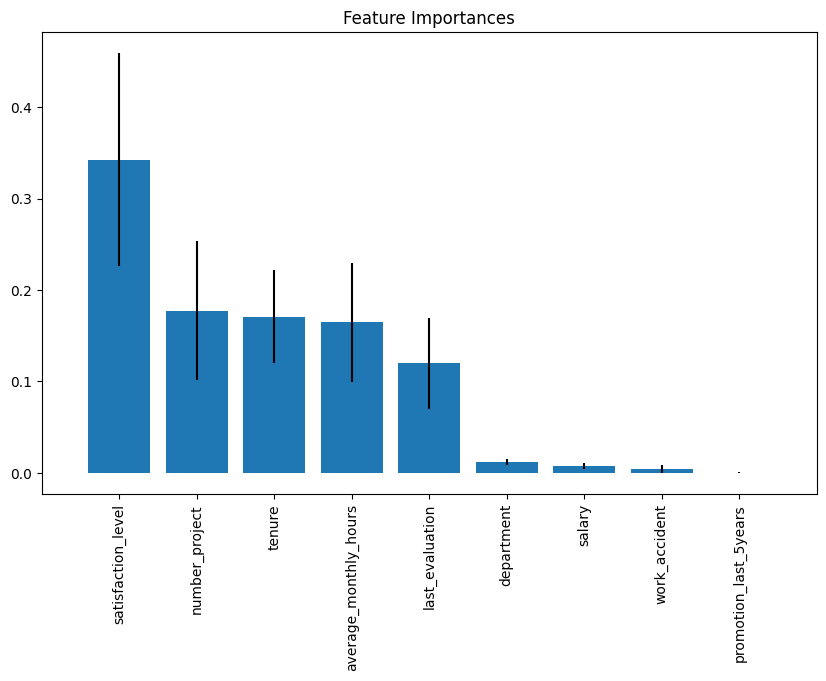

In [359]:
# --------- Feature Importances --------- 
feature_names = X3.columns.to_list()  
importances = model3.feature_importances_
std = np.std([tree.feature_importances_ for tree in model3.estimators_], axis=0) 
indices = np.argsort(importances)[::-1] 

# Prepare rotated labels
labels_rotated = [feature_names[indices[i]] for i in range(X3.shape[1])] 

# Visualization
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X3.shape[1]), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(X3.shape[1]), labels_rotated, rotation=90)
plt.xlim([-1, X3.shape[1]])
plt.show()